In [1]:
import torch
from torch import optim
import torchvision
from torchvision import datasets, transforms
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import helper

### Get the fashion data

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                               ##transforms.Normalize([0.5], [0.5]),
                               ])

trainset = datasets.FashionMNIST(root='./FashionMNISTdata', train=True, download=True, transform=transform)
testset = datasets.FashionMNIST(root='./FashionMNISTdata', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60, shuffle=True)

In [3]:
# Take a peek
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([60, 1, 28, 28])
torch.Size([60])


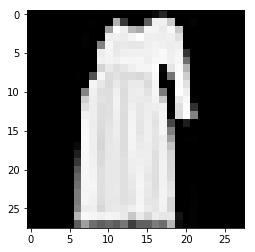

In [4]:
plt.imshow(images[17].numpy().squeeze(), cmap='Greys_r')

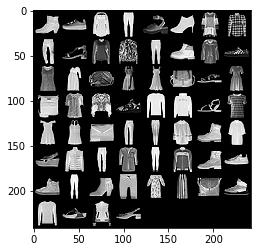

In [5]:
img_grid = torchvision.utils.make_grid(images).numpy()
plt.imshow(np.transpose(img_grid, (1, 2, 0)))

### Training

In [6]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 10),
                      nn.LogSoftmax(dim=1))

cost_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [10]:
epochs = 10
epoch_loss_arr = []

for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        #Forward propagate
        images = images.view(images.shape[0], -1)
                
        output = model.forward(images)
        
        # Calculate loss
        loss = cost_function(output, labels)
        
        optimizer.zero_grad()

        # Backward propagate
        loss.backward()
        
        # Optimize the parameters
        optimizer.step()
        
        running_loss += loss.item()
    else:  
        print(f'Loss at epoch {e}:', running_loss)
        epoch_loss_arr.append(running_loss)

Loss at epoch 0: 531.0779858827591
Loss at epoch 1: 516.9195135831833
Loss at epoch 2: 505.03715619444847
Loss at epoch 3: 494.44613476097584
Loss at epoch 4: 485.3669700175524
Loss at epoch 5: 477.39230014383793
Loss at epoch 6: 470.7384530454874
Loss at epoch 7: 464.38501289486885
Loss at epoch 8: 458.8087124824524
Loss at epoch 9: 453.8037211149931


### Testing

In [11]:
testloader = torch.utils.data.DataLoader(testset, batch_size=60, shuffle=True)

testiter = iter(testloader)
images, labels = testiter.next()

img = images[1]
img = img.resize_(1, 784)

preds = torch.exp(model(img))

print(preds)

tensor([[2.0677e-03, 9.7173e-01, 8.1938e-04, 2.4718e-02, 6.0419e-04, 1.4511e-07,
         4.0548e-05, 4.3047e-06, 9.6342e-06, 2.1907e-06]],
       grad_fn=<ExpBackward>)


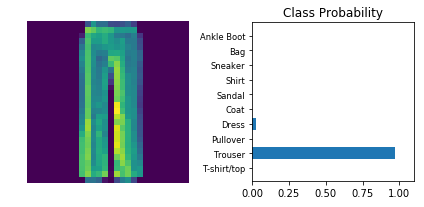

In [12]:
helper.view_classify(img, preds, version='Fashion')

### Visualization of Loss

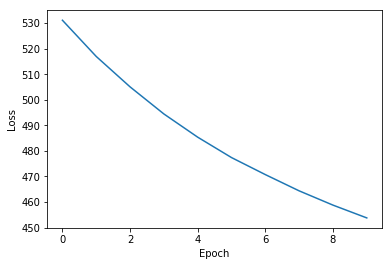

In [13]:
%matplotlib inline

plt.plot(epoch_loss_arr)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()